# Изучение закономерностей, определяющих успешность игр
Цель: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## 1 Шаг: открытие файла, изучение информации

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('games.csv')
print(data.info())
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
print('Уникальных названий игр:', len(data['Name'].unique()))
print('Количество дубликатов:', data.duplicated().sum())

Уникальных названий игр: 11560
Количество дубликатов: 0


In [5]:
# Проверяем, корректна ли информация в столбцах:

data['Platform'].unique()
data['Rating'].unique()
data['Year_of_Release'].unique()
data['User_Score'].unique()
data['Critic_Score'].unique()


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

В столбце с пользовательскими оценками "tbd" - оценка еще будет определена. Предполагаем, что это только касется 2016 года:

In [6]:
# предполагаем: что тбд для игр последних годов 
print('"tbd" share:', len(data[data['User_Score'] == 'tbd']) / len(data['User_Score'])) 

# смотрим, какие годы в тбд

data.query('User_Score == "tbd"')


"tbd" share: 0.1450194436135208


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [7]:
# видим, что не только последние годы, меняем на нан

data['User_Score'] = data['User_Score'].replace('tbd', None)


Из-за того, что мы оказались неправы в своем предположении, меняем все "тбд" на пропуски, таким образом унифицируем значения, которые некорректны.

***
Видим, что есть большое количество пропусков, разберемся с ними в шаге 2. И также в двух столбах необходимо поменять тип данных


  Что необходимо сделать в следующем шаге: скорректировать названия столбцов - привести к нижнему регистру, поменять тип данных в двух столбцах: год релиза и пользовательская оценка, убрать пропуски, создать столбец с суммарными продажами
  

## 2 Шаг: подготовка данных

### Корректировка названий столбцов

In [8]:
# корректируем названия столбов

data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типа данных

Для того, чтобы было возможно проводить расчеты с данными, нам необходимо изменить тип данных столбца пользовательской оценки в числовой тип, оставляем float, так как есть не только целые оценки. Проверяем смену через describe(), заодно проверили, что все рейтинги проставалены корректно (как указано в документации данных) - в рамках от 0 до 10.

  Тип данных столбца с годами релизов заменяем на целочисленный тип

In [9]:
# меняем тип данных

data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
print(data['user_score'].describe()) 

# Меняем тип данных на целое число
data['year_of_release'] = data['year_of_release'].astype('Int64')


count    8760.000000
mean        7.099749
std         1.520065
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64


### Обработка пропусков

Избавляемся от пропусков из столбца name, их всего два, плюс содержат слишком мало информации - бесполезны для нас. 

  Пропуски в остальных столбцах оставляем - они составляют большие доли данных, также содержат информацию, которая точно пригодится нам для дальнейшего анализа.

In [10]:
# обработка пропусков

data.dropna(subset=['name'], inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Замениv пропуски в столбце rating на NR (Not Rated). Дело в том, что было бы некорректно например поставить рейтинг E (Everyone), так как это было бы заведомо неправдой - конетент игр с пропущенным рейтингом, возможно никаак не проверялся, потому что этот рейтинг - дело добровольное. Конечно, у ESRB есть RT - Rating Pending. Но, как мы могли заметить, в данных есть довольно старые игры без рейтинга, то есть снова решение было бы не совсем корректно.

In [11]:
data['rating'] = data['rating'].fillna('NR')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       8760 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Столбец с суммарными продажами во всех регионах

In [12]:
# столбец с суммарными продажами во всех регионах
def sum_sales_calculation(row):
    sum_sales = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    return sum_sales

data['sum_sales'] = data.apply(sum_sales_calculation, axis=1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NR,0.01


***
Подготовили наши данные к анализу.

## 3 Шаг: исследовательский анализ данных

### Выпуск в разные годы. Важны ли данные за все периоды?


<AxesSubplot:xlabel='year_of_release'>

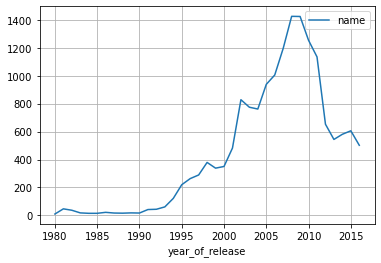

In [13]:
games_per_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.plot(grid=True)

Видим, что количество игр на протяжении всего времени был очень динамичным с несолькими пиками. Предположительно, рост выпуска после каждого из пиков связан с изменением игр/платформ/аудитории/внешними трендами. Соответственно, нам будет релевантна только относительно недавие данные, чтобы выводы по ней были актуальны на сегодняшний день.

### Изменение продаж по платформам

Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам.


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA'], dtype='object', name='platform')


<AxesSubplot:xlabel='year_of_release'>

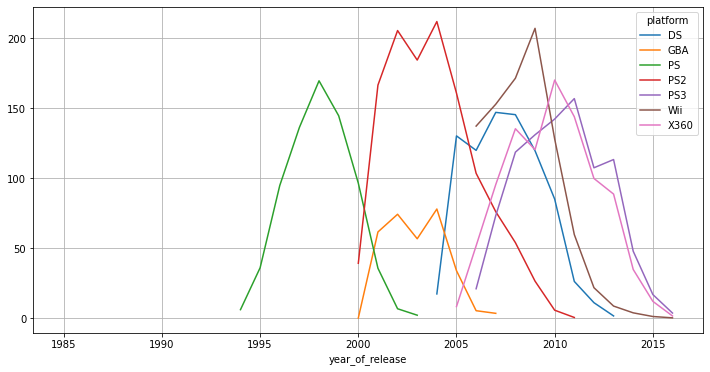

In [14]:
# сортировать платформы по суммарным продажам

top_platforms = data.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').sort_values(by='sum_sales', ascending=False).head(7).index
print(top_platforms)

# построить распределение по годам

data_top_platforms = data[data['platform'].isin(top_platforms)].pivot_table(index=['platform'], columns='year_of_release', values='sum_sales', aggfunc='sum').T
data_top_platforms

data_top_platforms.plot(grid=True, figsize=(12,6))


У всех топовых платформ примерно одинаковый жизненный цикл: длится он 7-10 лет, можно предположить, что продажи платформы падают, когда появляется ее новая версия, или лучшая версия у конкуретной компании (это заметно, когда на графике пересекаются линии PS-PS2-PS3). Интересно, что динамики PS3 и X360 почти совпадают друг с другом., это довод за повторяющийся паттерн жизни платформы.

### Определение актульного периода
Актуальным сделаем период за последние 4 года (включая 16): судя по графику 3.1, на момент 16 года начинается новый рост продаж игр, соответсвенно, появились/появляются новые платформы, это подтержается графиком 3.2 - топопвые платформы на 16 заканчивают свой жизенный цикл. Учитывая продолжительность этого цикла, нам будет достаточно 4 лет. 

  Формируем соответсвующий датасет, в дальнейшем будем исопльзовать только его.


In [16]:
latest_data = data[data['year_of_release'] >= 2013]
latest_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NR,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NR,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NR,0.01


### Лидирующие по продажам платформы
Какие платформы лидируют по продажам, растут или падают - несколько потенциально прибыльных платформ, график «ящик с усами» по глобальным продажам игр в разбивке по платформам


<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

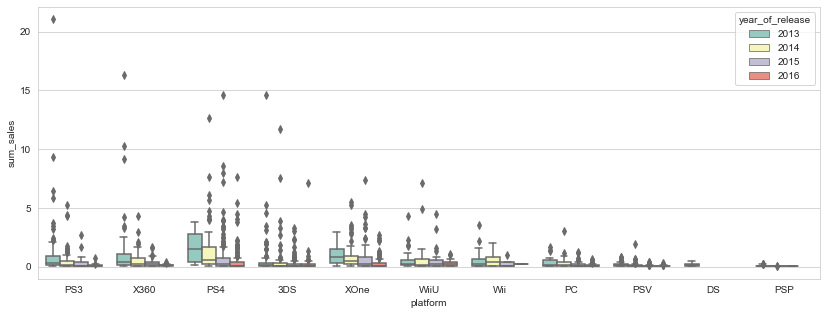

In [17]:

sns.set_style("whitegrid")

fig_dims = (14,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='platform', y='sum_sales', hue='year_of_release', data=latest_data, ax=ax, palette='Set3')

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

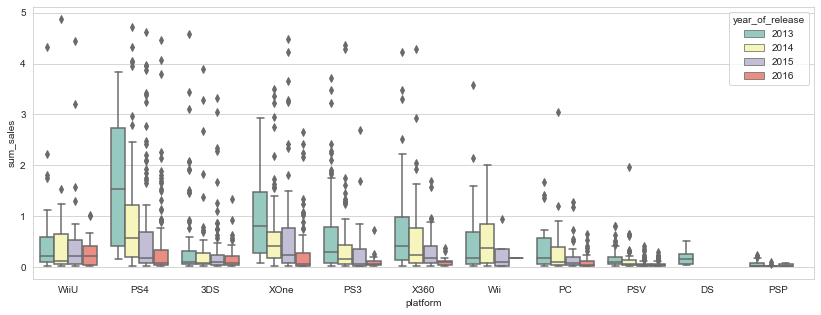

In [18]:
# график без выбросов

outlierless_latest_data = latest_data.query('sum_sales < 5')

fig_dims = (14,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='platform', y='sum_sales', hue='year_of_release', data=outlierless_latest_data, ax=ax, palette='Set3')


Удалять выбросы из самого датасета не будет правильным шагом - нам понадобятся эти данные дальше, но с ними данные на графике почти невозможно увидеть, поэтому второй график. На котором уже можно увидеть, что растущих и потенциально прибыльных платформы две: PS4 и XOne. Учитывая, что данные за 2016 год неполные, можно предположить, что эти две платформы будут продолжать динамику роста. Все остальные платформы с каждым годом теряюn в продажах.

  Лидирующих по продажам за этот период можно определить по количеству выбросов-успешных игр: PS4

### Влияние отзывов на продажи
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возмем самую популярную платформу за актуальный период - PS4. Для наглядности свзяи построим 2 диаграммы рассеивания: с выбросами и без, как и в предыдущем шаге.

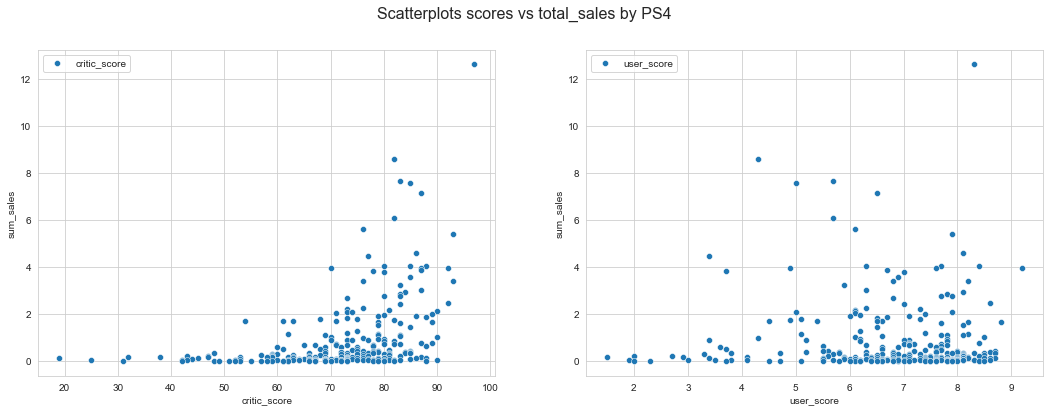

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.021142,0.143084,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.415008,-0.016671,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.346720,-0.044773,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.322358,0.173700,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.409191,-0.030987,0.998051
critic_score,-0.021142,0.415008,0.346720,0.322358,0.409191,1.000000,0.556037,0.406568
user_score,0.143084,-0.016671,-0.044773,0.173700,-0.030987,0.556037,1.000000,-0.027428
sum_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.406568,-0.027428,1.000000


In [19]:
# диаграмма рассеивания

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Влияние оценок на продажи PS4', fontsize=16)
for idx, score in enumerate(['critic_score', 'user_score']):
    sns.scatterplot(x=score, y='sum_sales', data=latest_data.query('platform == "PS4"'), ax=ax[idx], label=score)
    ax[idx].legend()
plt.show()

# корреляция

latest_data.query('platform == "PS4"').corr()

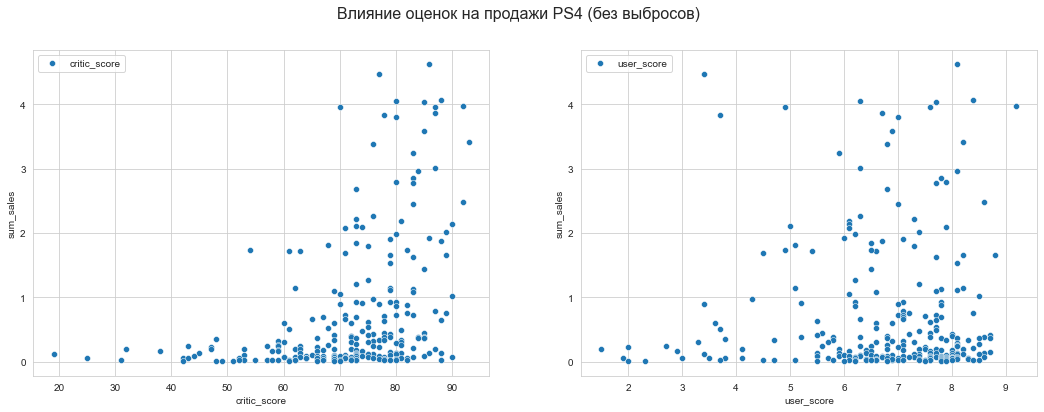

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.301024,-0.301848,-0.039370,-0.310162,-0.013331,0.144420,-0.313542
na_sales,-0.301024,1.000000,0.770505,0.273062,0.951824,0.392708,-0.020291,0.931642
eu_sales,-0.301848,0.770505,1.000000,0.369206,0.926825,0.348852,0.034990,0.946076
jp_sales,-0.039370,0.273062,0.369206,1.000000,0.336168,0.271435,0.181152,0.400772
other_sales,-0.310162,0.951824,0.926825,0.336168,1.000000,0.402608,0.009315,0.995772
critic_score,-0.013331,0.392708,0.348852,0.271435,0.402608,1.000000,0.580808,0.402080
user_score,0.144420,-0.020291,0.034990,0.181152,0.009315,0.580808,1.000000,0.019654
sum_sales,-0.313542,0.931642,0.946076,0.400772,0.995772,0.402080,0.019654,1.000000


In [20]:
#без выбросов

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Влияние оценок на продажи PS4 (без выбросов)', fontsize=16)
for idx, score in enumerate(['critic_score', 'user_score']):
    sns.scatterplot(x=score, y='sum_sales', data=outlierless_latest_data.query('platform == "PS4"'), ax=ax[idx], label=score)
    ax[idx].legend()
plt.show()

outlierless_latest_data.query('platform == "PS4"').corr()

По корреляции сразу понимаем, что продажи связаны с оценками критиков: чем больше оценка, тем больше продажи. Но обратная связь у продаж с отзывами пользователей, хоть она и совсем незначительная. Когда убираем выбросы, корреляция и вовсе становится положительной. По всей видимости, это была игра с большими продажами, но которая не очень понравилась пользователям. Значение корреляции с оценками критиков осталось примерно такой же: положительной и относительно сильной.

  По графикам можем увидеть подтверждение цифрам в мартице корреляций: с критиками прослеживается тенденция, с пользователями ее не видно. 
  

### Соотнесем выводы с продажами игр на других платформах.

In [21]:
latest_data.query('platform == "PS3"').corr()
latest_data.query('platform == "XOne"').corr()
latest_data.query('platform == "XOne"').corr()
latest_data.query('platform == "X360"').corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sum_sales
year_of_release,1.000000,-0.218293,-0.203537,-0.285360,-0.218199,-0.245439,-0.187791,-0.220495
na_sales,-0.218293,1.000000,0.866574,0.634340,0.985236,0.342724,-0.010435,0.984299
eu_sales,-0.203537,0.866574,1.000000,0.612002,0.934769,0.336418,-0.007579,0.941008
jp_sales,-0.285360,0.634340,0.612002,1.000000,0.641529,0.290613,0.091466,0.648860
other_sales,-0.218199,0.985236,0.934769,0.641529,1.000000,0.349204,-0.017004,0.998640
critic_score,-0.245439,0.342724,0.336418,0.290613,0.349204,1.000000,0.520946,0.350345
user_score,-0.187791,-0.010435,-0.007579,0.091466,-0.017004,0.520946,1.000000,-0.009928
sum_sales,-0.220495,0.984299,0.941008,0.648860,0.998640,0.350345,-0.009928,1.000000


С самыми популярными платформами тенденция сохраняется.

### Общее распределение игр по жанрам. 
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  app.launch_new_instance()


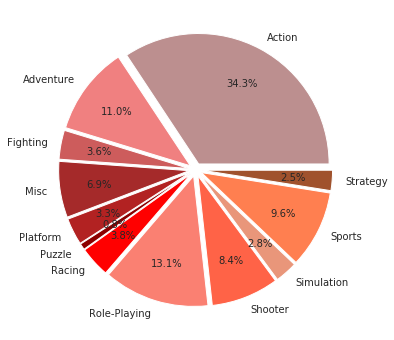

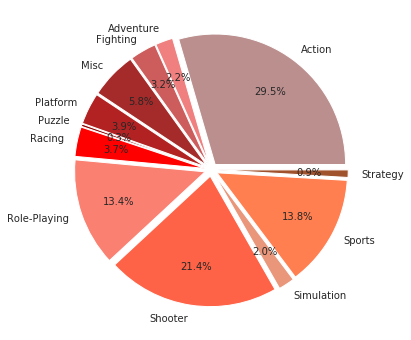

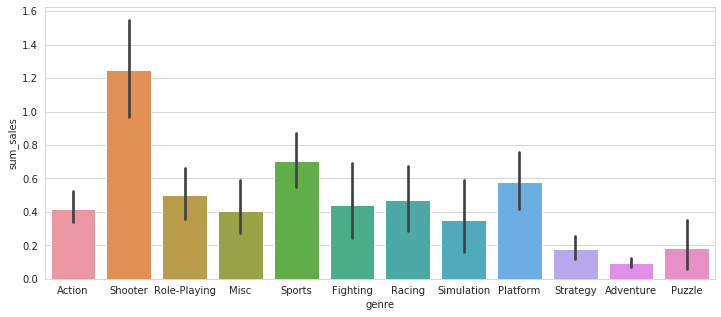

In [22]:
# доли жанров
genres_share = latest_data.pivot_table(index ='genre', values='sum_sales', aggfunc=['count', 'sum'])

pie, ax5 = plt.subplots(figsize=[10,6])
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors = ('rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'darkred', 'red', 'salmon', 'tomato', 'darksalmon', 'coral', 'sienna')
plt.pie(x = genres_share['count'], autopct="%.1f%%", pctdistance=0.7, explode=explode, labels=genres_share.index, colors=colors)


# прибыльность жанров

#относительная
pie, ax5 = plt.subplots(figsize=[10,6])
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
colors = ('rosybrown', 'lightcoral', 'indianred', 'brown', 'firebrick', 'darkred', 'red', 'salmon', 'tomato', 'darksalmon', 'coral', 'sienna')
plt.pie(x = genres_share['sum'], autopct="%.1f%%", pctdistance=0.7, explode=explode, labels=genres_share.index, colors=colors)

# абсолютная
fig_dims5 = (12,5)
fig, ax5 = plt.subplots(figsize=fig_dims5)
sns.barplot(data=latest_data, x='genre', y='sum_sales', ax=ax5)


Чтобы лучше понять прибыльность жанров, мы построили пайчарт, который показывает, какую долю занимает жанр игры в общих продажах. 

  Жанры, которых больше всего: Экшон, Ролевая, Приключения, Спорт и Стрелялки. Сразу бросается в глаза, что Стрелялки увеличили свою долю в два раза с 10 до 20 процентов, Спорт, Экшон и Ролевые остались примерно на тех же уровнях. Но Приключения совсем потерялись - 2 процента против 11, хоть их много, но не очень хорошо продаются.
  
  То есть среди всех жанров можно выделить два особенных: Шутеры и Приключения, первый отлично продается, второй наоборот, при примерно одинаковых долях в объеме.

## 4 Шаг: портрет пользователя по регионам (NA, EU, JP)

### Самые популярные платформы, жынры и превалирующие рейтинги

In [33]:
# платформы

plats_per_region = []
for reg in regions:
    plats = latest_data\
        .groupby('platform', as_index=False)\
        .agg({reg: 'sum'})\
        .sort_values(by=reg, ascending=False)\
        .head(5)\
        .rename(columns={'platform': reg[:2]+'_plats'})\
        .reset_index(drop=True)
    
    # складываем кусочки в список
    plats_per_region += [plats]
    
display(pd.concat(plats_per_region, axis=1).style.bar(color='lightgreen').set_caption('Top Platforms in NA, EU, JP'))


# жанры

genres_per_region = []
for reg in regions:
    gens = latest_data\
        .groupby('genre', as_index=False)\
        .agg({reg: 'sum'})\
        .sort_values(by=reg, ascending=False)\
        .head(5)\
        .rename(columns={'genre': reg[:2]+'_genres'})\
        .reset_index(drop=True)
    
    # складываем кусочки в список
    genres_per_region += [gens]
    
display(pd.concat(genres_per_region, axis=1).style.bar(color='lightblue').set_caption('Top Genres in NA, EU, JP'))

# рейтинг

rating_per_region = []
for reg in regions:
    ratings = latest_data\
        .groupby('rating', as_index=False)\
        .agg({reg: 'sum'})\
        .sort_values(by=reg, ascending=False)\
        .head(5)\
        .rename(columns={'rating': reg[:2]+'_rating'})\
        .reset_index(drop=True)
    
    # складываем кусочки в список
    rating_per_region += [ratings]
    
pd.concat(rating_per_region, axis=1)
pd.concat(rating_per_region, axis=1).style.bar(color='lightpink').set_caption('Top Ratings in NA, EU, JP')

,na_plats,na_sales,eu_plats,eu_sales,jp_plats,jp_sales
0,PS4,108.74,PS4,141.09,3DS,67.81
1,XOne,93.12,PS3,67.81,PS3,23.35
2,X360,81.66,XOne,51.59,PSV,18.59
3,PS3,63.5,X360,42.52,PS4,15.96
4,3DS,38.2,3DS,30.96,WiiU,10.88


,na_genres,na_sales,eu_genres,eu_sales,jp_genres,jp_sales
0,Action,126.05,Action,118.13,Role-Playing,51.04
1,Shooter,109.74,Shooter,87.86,Action,40.49
2,Sports,65.27,Sports,60.52,Misc,9.2
3,Role-Playing,46.4,Role-Playing,36.97,Fighting,7.65
4,Misc,27.49,Racing,20.19,Shooter,6.61


,na_rating,na_sales,eu_rating,eu_sales,jp_rating,jp_sales
0,M,165.21,M,145.32,NR,85.05
1,NR,89.42,E,83.36,T,20.59
2,E,79.05,NR,78.91,E,15.14
3,E10+,54.24,E10+,42.69,M,14.11
4,T,49.79,T,41.95,E10+,5.89


В Северной Америке самое большое разнообразие: все лидирующие там платформы представлены в больших, и относительно равных объемах. XBox и PlayStation занимают почти равные доли, если брать во внимание сразу по две консоли. В Европе же предпочитают PlayStation: первые два места занимают 4 и 3 поколение, все остальные распределились более или менеее равномерно. В Японии совсем один лидер - 3DS, остальные распределились равномерно, но малые доли занимают.

 Ведущий жанр во всех регионах - Экшон, за ним идут Шутер и Спортивные игры (эти двое только в Северной Америке и Европе). Как мы помним с пайчарта, как эти были одними из самых прибыльных, и они разделились по первым двум регионам. Когда же еще один популяный жанр - Ролевой, занял бОльшую долю в Японии.
 
 По графику мы видим, что действительно, определенные рейтинги превалируют в регионах: M (Matured) и T (Teen). Возможно, такое распределение свзязано с предпочитаемыми жанрами. При условии, что самые популярные - Экшон и Шутеры, можно сказать, что сам рейтинг как таковой не сильно влияет на продажи, скорее жанр - определяющий фактор, а рейтинг как побочный эффект. Единственное, большую долю занимают во всех регионах игры без установленного рейтинга.
 
 ***


## 5 Шаг: Проверка гипотез
Для провекри гипотез будем использовать метод ttest_ind, так как мы будем считать, что наши выборки по двум тарифам взяты из двух разных генеральных совокупостей, соответственно, нам больше всего подходит этот метод. alpha будем брать 0.05: наша ошибка не будет критичной. Нулевые гипотезы сформулированы с условием равенства.


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

    H0: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

    H1: Средние пользовательские рейтинги платформ Xbox One и PC не равны


In [34]:
user_score_xbox1 = latest_data.query('platform == "XOne"')['user_score']
user_score_pc = latest_data.query('platform == "PC"')['user_score']


if (np.var(user_score_xbox1) / np.var(user_score_pc)) > 0.05:
    print('Дисперсии не равны друг другу')
else:
    print('Будем считать дисперсии равными')
    

Дисперсии не равны друг другу


In [35]:
alpha = 0.05

result1 = st.ttest_ind(user_score_xbox1, user_score_pc, equal_var=False, nan_policy='omit')

if (result1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Средние пользовательские рейтинги жанров Action и Sports разные.

    H0: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

    H1: Средние пользовательские рейтинги жанров Action и Sports не равны

In [37]:

user_score_action = latest_data.query('genre == "Action"')['user_score']
user_score_sports = latest_data.query('genre == "Sports"')['user_score']

if (np.var(user_score_action) / np.var(user_score_sports)) > 0.05:
    print('Дисперсии не равны друг другу')
else:
    print('Будем считать дисперсии равными')


Дисперсии не равны друг другу


In [38]:
result1 = st.ttest_ind(user_score_action, user_score_sports, equal_var=False, nan_policy='omit')

if (result1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


И снова не удалось отвергнуть нулевую гипотезу, можем склоняться в сторону того, что средние пользовательские рейтинги попарно равны друг другу

# Общий вывод по проекту

Мы провели анализ данных о продажах видеоигр, главной задачей которого было выявить определяющие успешность игры закономерности.

  Мы посмотрели данные в разрезе по годам, жанрам, платформам и регонам. Одним из основых выводов, которые мы получили в ходе анализа: не смотря на общую статистику и схожие тенденции, все-таки регионы имеют свои собственные предпочтения.
  
  Но если говорить глобально, опираясь на данные с 2013 года, мы выделили самые популярные жанры: Экшон, Шутеры, Спорт и Ролевые. Такой набор жанров определяет и набор рейтингов, занимающий бОльшую долю: Mature и Teen.
  
  Что касается других рейтингов - оценок критиками и пользователями, мы выявили, что первые имеют влияние на популярность игры, а оценка самх игроков не сильно влияет на объем продаж, что логично.
